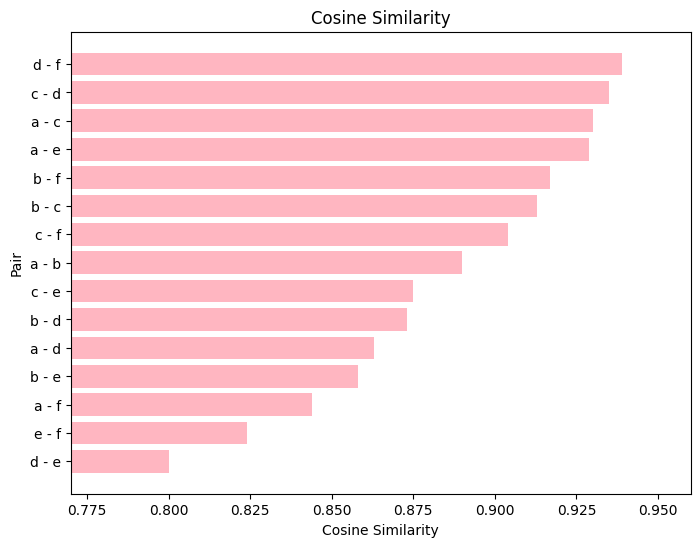

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

a = [6, 7, 3, 6, 3, 3, 3, 8, 9, 5, 7, 6, 6, 8, 3, 4]
b = [9, 3, 4, 3, 2, 5, 3, 9, 8, 10, 7, 8, 5, 1, 3, 4]
c = [6, 5, 4, 8, 6, 5, 3, 7, 9, 6, 7, 6, 6, 2, 7, 3]
d = [7, 1, 3, 5, 9, 9, 4, 7, 8, 7, 7, 5, 5, 5, 9, 7]
e = [4, 8, 3, 6, 2, 1, 8, 9, 9, 8, 3, 9, 3, 7, 5, 4]
f = [9, 2, 9, 3, 9, 7, 7, 7, 7, 9, 8, 9, 4, 3, 6, 8]

lists = [a, b, c, d, e, f]
names = ["a", "b", "c", "d", "e", "f"]

results_cosine = []
results_pearson = []  # Assuming you have data for results_pearson
results_normalized_dot_product = []  # Assuming you have data for results_normalized_dot_product

for i in range(len(lists)):
    for j in range(i + 1, len(lists)):
        cosine_similarity = np.dot(lists[i], lists[j]) / (np.linalg.norm(lists[i]) * np.linalg.norm(lists[j]))
        rounded_cosine_similarity = round(cosine_similarity, 3)
        results_cosine.append((f"{names[i]} - {names[j]}", rounded_cosine_similarity))

# Sort results from highest to lowest cosine similarity
sorted_results_cosine = sorted(results_cosine, key=lambda x: x[1], reverse=True)
sorted_results_pearson = sorted(results_pearson, key=lambda x: x[1], reverse=True)
sorted_results_normalized_dot_product = sorted(results_normalized_dot_product, key=lambda x: x[1], reverse=True)

# Create Pandas DataFrames for cosine similarity, Pearson correlation, and normalized dot product
df = pd.DataFrame(sorted_results_cosine, columns=["Pair", "Cosine Similarity"])

# Reverse the DataFrames' order (largest value at the top)
df = df[::-1]

# Create a separate graph for Combined Similarity
fig, ax = plt.subplots(figsize=(8, 6))

# Combined Similarity plot
ax.barh(df["Pair"], df["Cosine Similarity"], color='lightpink')
ax.set_xlabel("Cosine Similarity")
ax.set_ylabel("Pair")
ax.set_title("Cosine Similarity")

# Set the x-axis limits
ax.set_xlim(0.77, 0.96)

plt.show()


In [2]:
# Assuming you already have DataFrames df_combined with columns 'Person1', 'Person2', and 'Combined Similarity'
df[['Person1', 'Person2']] = df['Pair'].str.split(' - ', expand=True)

# Create a list of unique names
unique_names = pd.concat([df['Person1'], df['Person2']]).unique()

# Initialize an empty DataFrame for mostSimilar
mostSimilar = pd.DataFrame({'Name': unique_names})

# Iterate through unique names to find the most similar friend and their score
most_similar = []
scores = []
for name in unique_names:
    # Filter rows where the person is either 'Person1' or 'Person2'
    sub_df = df[(df['Person1'] == name) | (df['Person2'] == name)]
    
    # Find the index of the row with the maximum combined similarity
    max_row_index = sub_df['Cosine Similarity'].idxmax()
    
    # Get the row with the maximum combined similarity
    max_row = sub_df.loc[max_row_index]
    
    # Determine the most similar friend and their score
    if max_row['Person1'] == name:
        most_similar.append(max_row['Person2'])
    else:
        most_similar.append(max_row['Person1'])
    scores.append(max_row['Cosine Similarity'])

# Add 'Most Similar' and 'Score' columns to mostSimilar DataFrame
mostSimilar['Most Similar'] = most_similar
mostSimilar['Score'] = scores

# Order the DataFrame by 'Score' in descending order
mostSimilar = mostSimilar.sort_values(by='Score', ascending=False)

# Display the top 10 rows of the mostSimilar DataFrame
mostSimilar.head(10)


,Name,Most Similar,Score
0,d,d,0.939
4,c,d,0.935
2,a,c,0.930
1,e,a,0.929
3,b,d,0.917


In [3]:
results = []

# Iterate over unique names
for name in unique_names:
    count = 0
    total_score = 0
    
    # Iterate through the DataFrame rows
    for index, row in df.iterrows():
        if name in row['Person1'] or name in row['Person2']:
            total_score += row['Cosine Similarity']
            count += 1
    
    # Calculate the average score
    average_score = total_score / count if count > 0 else 0
    
    # Append results to the list
    results.append([name, average_score])

# Create a DataFrame from the results
avg_score = pd.DataFrame(results, columns=['Name', 'Average Score'])

# Sort the DataFrame in descending order by "Average Score"
avg_score = avg_score.sort_values(by='Average Score', ascending=False)

# Reset the index to maintain a continuous index in the sorted DataFrame
avg_score.reset_index(drop=True, inplace=True)

# Print the resulting DataFrame
avg_score.head(10)

,Name,Average Score
0,c,0.911400
1,a,0.891200
2,b,0.890200
3,d,0.877667
4,e,0.857200
